#GRIP @ THE SPARKS FOUNDATION- 2023
##TASK 1: Prediction using Supervised ML
###To Predict the percentage of an student based on the no. of study hours.

#Author: Srikar Kadiyala

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Step1- Reading the data from source

In [2]:
# Reading the Data 
url= "http://bit.ly/w-data"
data = pd.read_csv('http://bit.ly/w-data')
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print("Student Data imported successfully!")

Student Data imported successfully!


In [4]:
# Check if there any null value in the Dataset
data.isnull == True 

False

#####Since there is no null value in the Dataset so, we can now visualize our Data

#step 2-Input data Visualization

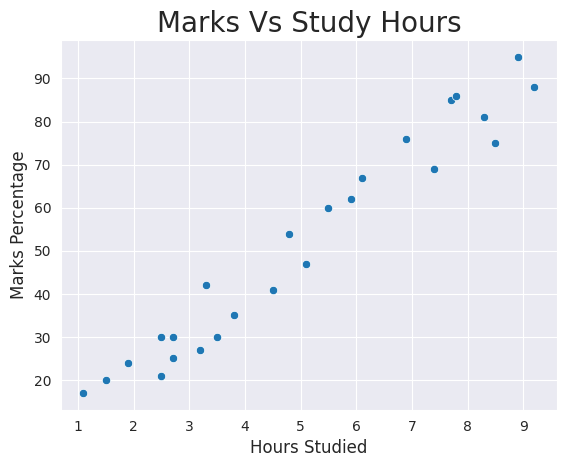

In [5]:
# Plotting the distribution of score
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#Step 3 - Data Preprocessing
###This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [6]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#Step4- Model Training
###Splitting the data into training and testing sets, and training the algorithm.

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


#####From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

#Step 5 - Plotting the Line of regression
###Since the model is trained now, it's the time to visualize the best-fit line of regression.

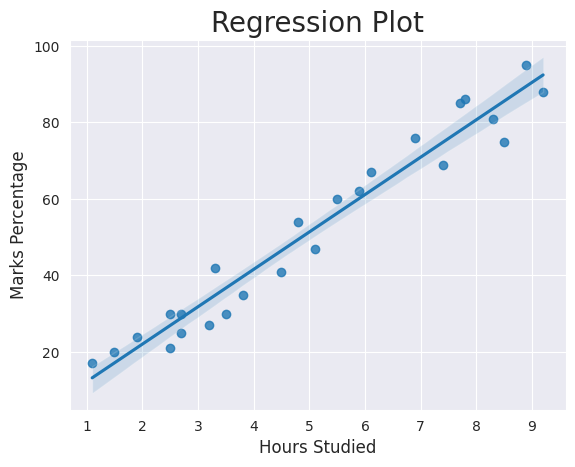

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
# Plotting the regression line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#Step6- - Making Predictions
Now that this algorithm is trained, it's time to test the model by making some predictions.

For this we will use our test-set data

In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#Step7- Comparing Actual result to the Predicted Model result

In [10]:
# Comparing Actual vs Predicted
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores


,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


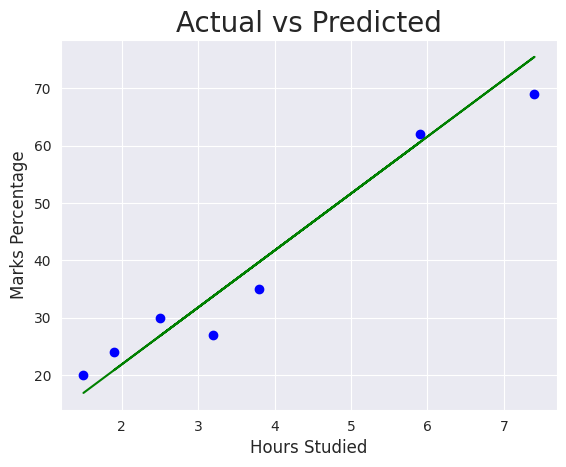

In [11]:
#Visually Comparing the Predicted Marks with the Actual Marks

plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='green')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

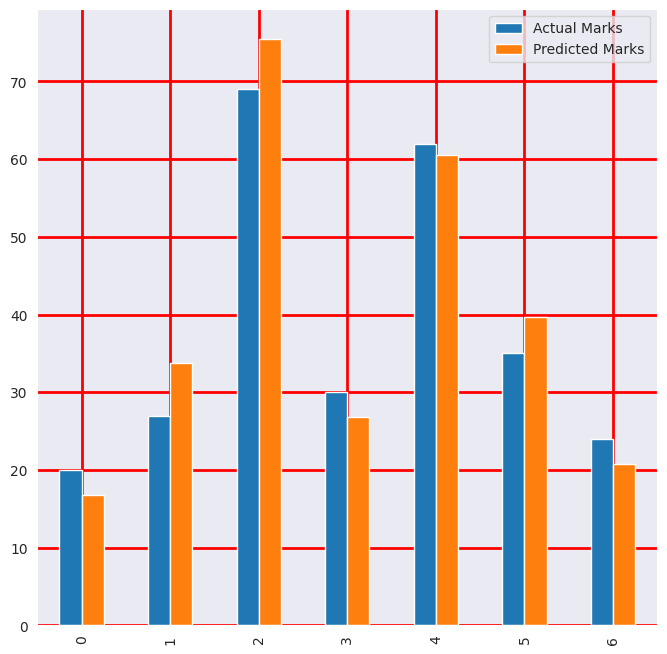

In [12]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
compare_scores.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linewidth='2.0', color='red')
plt.grid(which='minor', linewidth='2.0', color='blue')
plt.show()

In [13]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regression.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


#Step8- Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [14]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


#What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [15]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],6)))
print("Approximate Score = {}".format(round(answer[0],2)))

Score = 93.892729
Approximate Score = 93.89


#From the above model it's predicted that, if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.
#THANK YOU